# Hipotesis 1
# ¿El aumento de las producción de energía renovable contribuye a nisminuir el CO2?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df_emissions_raw = pd.read_csv('./data/Emissions_de_GEH_a_Catalunya_20250127.csv', sep=',', decimal='.')

df_emissions = df_emissions_raw.groupby(['ANY', 'CONTAMINANT'])['CO2EQ'].sum().unstack().loc[:, ['CO2', 'CH4', 'N2O']]
df_emissions['EMISSIONS TOTAL'] = df_emissions['CO2'] + df_emissions['CH4'] + df_emissions['N2O']

df_emissions

CONTAMINANT,CO2,CH4,N2O,EMISSIONS TOTAL
ANY,,,,
1990,25065.077518,6125.122896,1175.864876,32366.065290
1991,26011.810956,5870.054213,1179.698817,33061.563987
1992,26575.781971,5925.402693,1182.265898,33683.450561
1993,25361.790976,6016.370088,1220.261155,32598.422219
1994,27865.885286,6316.920888,1432.518715,35615.324889
1995,32196.421925,6541.270308,1432.630040,40170.322274
1996,30487.592661,6675.632163,1551.455543,38714.680367
1997,30145.129078,6683.473045,1472.645483,38301.247606
1998,30923.605763,6768.570160,1486.132311,39178.308234


In [3]:
df_primary_production_raw = pd.read_excel('./data/Primary.xlsx')

df_primary_production = df_primary_production_raw.T
df_primary_production.columns = df_primary_production.iloc[0]
df_primary_production = df_primary_production[1:]

df_primary_production

ANY,PROD ENERGIES NO REN,Prod Carbó,Prod Petroli,Prod Gas natural,Prod Nuclear,Prod Residus industrials no renovables,PROD ENERGIES REN,Prod Solar,Prod Eòlica,Prod Hidràulica,...,Cons Solar fotovoltaica,Cons Solar termoelèctrica,Cons Eòlica,Cons Hidràulica,"Cons Biomassa agrària, animal i forestal",Cons Residus renovables,Cons Biogàs,Cons Biocarburants,Cons Calor ambient,CONS TOTAL
1990,6567.0469,170.4,686.8,2.3,5674.8969,32.65,484.277026,1.2,0.00387,250.923156,...,0.0,0.0,0.00387,250.923156,211.5,20.65,0.0,0.0,0.0,17079.788151
1991,6864.521152,198.6,980.9,2.3,5642.74953,39.971622,563.743324,1.3,0.061892,295.781432,...,0.0,0.0,0.061892,295.781432,239.187497,27.3,0.0,0.0,0.0,17684.077087
1992,6805.087734,142.8,1012.1,2.2,5602.039272,45.948462,652.274498,1.3,0.062522,405.232748,...,0.0,0.0,0.062522,405.232748,211.506167,34.079228,0.0,0.0,0.0,17675.557529
1993,6586.565375,147.0,848.9,2.3,5540.879403,47.485972,547.739964,1.3,0.080549,353.072837,...,0.0,0.0,0.080549,353.072837,156.693684,36.320608,0.265969,0.0,0.0,17862.920103
1994,6726.535187,159.0,802.3,2.1,5712.643503,50.491684,539.805751,1.3,0.119699,384.42408,...,0.0,0.0,0.119699,384.42408,115.497295,38.149015,0.212957,0.0,0.0,18371.133887
1995,6257.65338,135.3,647.9,2.1,5406.786216,65.567164,497.465693,1.3,0.343761,333.378003,...,0.0,0.0,0.343761,333.378003,110.230742,51.878714,0.365216,0.0,0.0,18919.388739
1996,6519.157112,137.8,503.3,1.8,5806.02591,70.231202,659.620063,1.4,0.70883,494.661808,...,0.0,0.0,0.70883,494.661808,108.419513,53.944949,0.404476,0.0,0.0,20011.333529
1997,6432.948026,142.4,371.5,1.7,5837.55471,79.793316,607.274901,1.406517,0.603061,447.910058,...,0.006517,0.0,0.603061,447.910058,95.675278,61.626982,0.028283,0.0,0.0,20426.894776
1998,6976.11283,115.6,529.1,2.2,6249.79899,79.41384,542.741251,1.403978,0.726958,386.572058,...,0.003978,0.0,0.726958,386.572058,94.0674,59.699992,0.338265,0.0,0.0,21492.951887
1999,6636.025847,116.1,292.4,2.0,6136.554483,88.971364,528.040106,1.603643,7.551547,365.643669,...,0.003643,0.0,7.551547,365.643669,91.5135,61.316835,0.324412,0.0,0.0,22405.606688


In [4]:
df_concated = pd.concat([df_emissions, df_primary_production], axis=1)
df_concated

,CO2,CH4,N2O,EMISSIONS TOTAL,PROD ENERGIES NO REN,Prod Carbó,Prod Petroli,Prod Gas natural,Prod Nuclear,Prod Residus industrials no renovables,...,Cons Solar fotovoltaica,Cons Solar termoelèctrica,Cons Eòlica,Cons Hidràulica,"Cons Biomassa agrària, animal i forestal",Cons Residus renovables,Cons Biogàs,Cons Biocarburants,Cons Calor ambient,CONS TOTAL
1990,25065.077518,6125.122896,1175.864876,32366.065290,6567.0469,170.4,686.8,2.3,5674.8969,32.65,...,0.0,0.0,0.00387,250.923156,211.5,20.65,0.0,0.0,0.0,17079.788151
1991,26011.810956,5870.054213,1179.698817,33061.563987,6864.521152,198.6,980.9,2.3,5642.74953,39.971622,...,0.0,0.0,0.061892,295.781432,239.187497,27.3,0.0,0.0,0.0,17684.077087
1992,26575.781971,5925.402693,1182.265898,33683.450561,6805.087734,142.8,1012.1,2.2,5602.039272,45.948462,...,0.0,0.0,0.062522,405.232748,211.506167,34.079228,0.0,0.0,0.0,17675.557529
1993,25361.790976,6016.370088,1220.261155,32598.422219,6586.565375,147.0,848.9,2.3,5540.879403,47.485972,...,0.0,0.0,0.080549,353.072837,156.693684,36.320608,0.265969,0.0,0.0,17862.920103
1994,27865.885286,6316.920888,1432.518715,35615.324889,6726.535187,159.0,802.3,2.1,5712.643503,50.491684,...,0.0,0.0,0.119699,384.42408,115.497295,38.149015,0.212957,0.0,0.0,18371.133887
1995,32196.421925,6541.270308,1432.630040,40170.322274,6257.65338,135.3,647.9,2.1,5406.786216,65.567164,...,0.0,0.0,0.343761,333.378003,110.230742,51.878714,0.365216,0.0,0.0,18919.388739
1996,30487.592661,6675.632163,1551.455543,38714.680367,6519.157112,137.8,503.3,1.8,5806.02591,70.231202,...,0.0,0.0,0.70883,494.661808,108.419513,53.944949,0.404476,0.0,0.0,20011.333529
1997,30145.129078,6683.473045,1472.645483,38301.247606,6432.948026,142.4,371.5,1.7,5837.55471,79.793316,...,0.006517,0.0,0.603061,447.910058,95.675278,61.626982,0.028283,0.0,0.0,20426.894776
1998,30923.605763,6768.570160,1486.132311,39178.308234,6976.11283,115.6,529.1,2.2,6249.79899,79.41384,...,0.003978,0.0,0.726958,386.572058,94.0674,59.699992,0.338265,0.0,0.0,21492.951887
1999,31738.969721,6987.143100,1503.253337,40229.366158,6636.025847,116.1,292.4,2.0,6136.554483,88.971364,...,0.003643,0.0,7.551547,365.643669,91.5135,61.316835,0.324412,0.0,0.0,22405.606688


In [5]:
df_concated_short = df_concated[['EMISSIONS TOTAL', 'CO2', 'CH4', 'N2O', 'PROD ENERGIES NO REN', 'PROD ENERGIES REN', 'PROD TOTAL', 'CONS ENERGIES NO REN', 'CONS ENERGIES REN', 'CONS TOTAL']]
df_concated_short

,EMISSIONS TOTAL,CO2,CH4,N2O,PROD ENERGIES NO REN,PROD ENERGIES REN,PROD TOTAL,CONS ENERGIES NO REN,CONS ENERGIES REN,CONS TOTAL
1990,32366.065290,25065.077518,6125.122896,1175.864876,6567.0469,484.277026,7051.323926,16595.511124,484.277026,17079.788151
1991,33061.563987,26011.810956,5870.054213,1179.698817,6864.521152,563.743324,7428.264476,17120.446267,563.63082,17684.077087
1992,33683.450561,26575.781971,5925.402693,1182.265898,6805.087734,652.274498,7457.362232,17023.376864,652.180665,17675.557529
1993,32598.422219,25361.790976,6016.370088,1220.261155,6586.565375,547.739964,7134.305339,17315.186455,547.733647,17862.920103
1994,35615.324889,27865.885286,6316.920888,1432.518715,6726.535187,539.805751,7266.340938,17831.430841,539.703046,18371.133887
1995,40170.322274,32196.421925,6541.270308,1432.630040,6257.65338,497.465693,6755.119072,18421.892305,497.496435,18919.388739
1996,38714.680367,30487.592661,6675.632163,1551.455543,6519.157112,659.620063,7178.777175,19351.793953,659.539576,20011.333529
1997,38301.247606,30145.129078,6683.473045,1472.645483,6432.948026,607.274901,7040.222927,19819.644598,607.250179,20426.894776
1998,39178.308234,30923.605763,6768.570160,1486.132311,6976.11283,542.741251,7518.854081,20950.143236,542.808651,21492.951887
1999,40229.366158,31738.969721,6987.143100,1503.253337,6636.025847,528.040106,7164.065953,21877.653081,527.953606,22405.606688


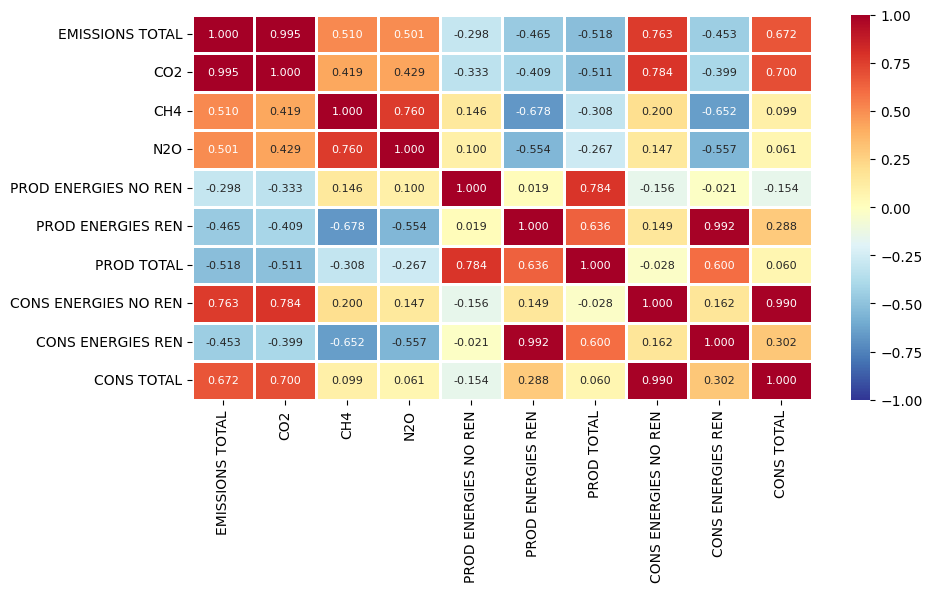

In [6]:
from matplotlib.colors import LinearSegmentedColormap

correlation_matrix = df_concated_short.corr()

fig, ax = plt.subplots(figsize=(10, 5))

heatmap = sns.heatmap(
    correlation_matrix,
    vmin=-1,
    vmax=1,
    cmap='RdYlBu_r',
    annot=True,
    annot_kws={'size': 8},
    fmt='.3f',
    cbar=True,
    linewidths=1,
    alpha=1,
    ax=ax
)

plt.show()

In [7]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df_concated['CO2'], df_concated['PROD ENERGIES REN'].astype(float))

print(f'Trend: {slope:.2f}')
print(f'Intercept: {intercept:.2f}')
print(f'Correlation coefficient: {r_value:.2f}')
print(f'P-value: {p_value:.10f}')
print(f'Standard error: {std_err:.2f}')

if p_value < 0.05:
    print("YES, significant")
else:
    print("NO, non significant")


Trend: -0.03
Intercept: 1756.97
Correlation coefficient: -0.41
P-value: 0.0179987417
Standard error: 0.01
YES, significant


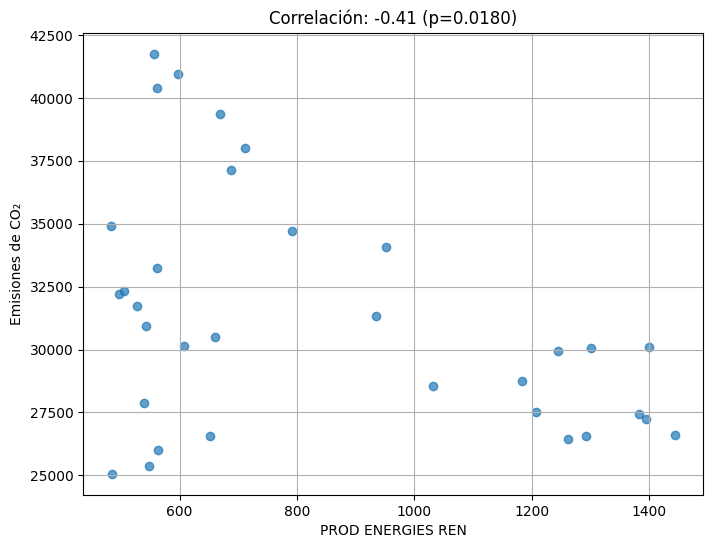

In [8]:
import scipy.stats as stats

correlacion, p_valor = stats.pearsonr(df_concated['PROD ENERGIES REN'].astype(float), df_concated['CO2'])

plt.figure(figsize=(8, 6))
plt.scatter(df_concated['PROD ENERGIES REN'].astype(float), df_concated['CO2'], alpha=0.7)
plt.xlabel('PROD ENERGIES REN')
plt.ylabel('Emisiones de CO₂')
plt.title(f'Correlación: {correlacion:.2f} (p={p_valor:.4f})')
plt.grid(True)
plt.show()

In [9]:
slope, intercept, r_value, p_value, std_err = linregress(df_concated['CH4'], df_concated['PROD ENERGIES REN'].astype(float))

print(f'Trend: {slope:.2f}')
print(f'Intercept: {intercept:.2f}')
print(f'Correlation coefficient: {r_value:.2f}')
print(f'P-value: {p_value:.10f}')
print(f'Standard error: {std_err:.2f}')

if p_value < 0.05:
    print("YES, significant")
else:
    print("NO, non significant")

Trend: -0.47
Intercept: 3826.71
Correlation coefficient: -0.68
P-value: 0.0000147543
Standard error: 0.09
YES, significant


In [10]:
slope, intercept, r_value, p_value, std_err = linregress(df_concated['N2O'], df_concated['PROD ENERGIES REN'].astype(float))

print(f'Trend: {slope:.2f}')
print(f'Intercept: {intercept:.2f}')
print(f'Correlation coefficient: {r_value:.2f}')
print(f'P-value: {p_value:.10f}')
print(f'Standard error: {std_err:.2f}')

if p_value < 0.05:
    print("YES, significant")
else:
    print("NO, non significant")

Trend: -1.66
Intercept: 3027.18
Correlation coefficient: -0.55
P-value: 0.0008133359
Standard error: 0.45
YES, significant


In [11]:
slope, intercept, r_value, p_value, std_err = linregress(df_concated['EMISSIONS TOTAL'], df_concated['PROD ENERGIES REN'].astype(float))

print(f'Trend: {slope:.2f}')
print(f'Intercept: {intercept:.2f}')
print(f'Correlation coefficient: {r_value:.2f}')
print(f'P-value: {p_value:.10f}')
print(f'Standard error: {std_err:.2f}')

if p_value < 0.05:
    print("YES, significant")
else:
    print("NO, non significant")

Trend: -0.03
Intercept: 2061.56
Correlation coefficient: -0.46
P-value: 0.0064560921
Standard error: 0.01
YES, significant


# Hipotesis 2
# ¿Cuanta energía hay que dejar de consumir para bajar la emicion de CO2 un X% ?

A su vez, la Ley 7/2021, de 20 de mayo, de cambio climático y transición energética establece un objetivo nacional de reducción de emisiones de gases de efecto invernadero del 23% respecto a niveles de 1990 para el conjunto de toda la economía. 

# X = 23% (de 1990)

In [12]:
df_model = df_concated[['CO2', 'CONS TOTAL']]

df_model

,CO2,CONS TOTAL
1990,25065.077518,17079.788151
1991,26011.810956,17684.077087
1992,26575.781971,17675.557529
1993,25361.790976,17862.920103
1994,27865.885286,18371.133887
1995,32196.421925,18919.388739
1996,30487.592661,20011.333529
1997,30145.129078,20426.894776
1998,30923.605763,21492.951887
1999,31738.969721,22405.606688


In [13]:
df_model['CONS TOTAL'] = df_model['CONS TOTAL'].astype(float)

/var/folders/v_/gk51vt417q9d6n5mw6_phw500000gn/T/ipykernel_2097/2282208286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['CONS TOTAL'] = df_model['CONS TOTAL'].astype(float)


In [14]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 1990 to 2022
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CO2         33 non-null     float64
 1   CONS TOTAL  33 non-null     float64
dtypes: float64(2)
memory usage: 792.0 bytes


In [15]:
from sklearn.linear_model import LinearRegression

X = df_model[['CONS TOTAL']]
y = df_model['CO2']

model = LinearRegression()
model.fit(X, y)

current_co2 = y.iloc[-33]  # 1990
target_co2 = current_co2 * 0.77  # para menos 23%

required_energy = (target_co2 - model.intercept_) / model.coef_[0]
print(f'Para reducir las emisiones de CO2 en un 23% respecto a 1990, el consumo de energía debe disminuir a: {required_energy:.2f}')

Para reducir las emisiones de CO2 en un 23% respecto a 1990, el consumo de energía debe disminuir a: 12790.44


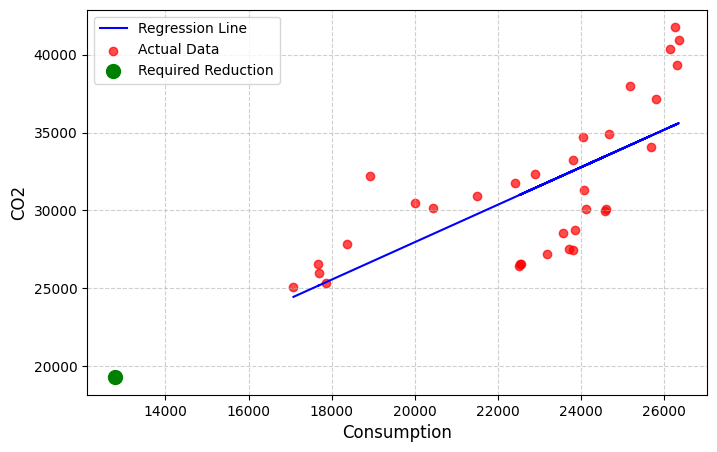

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(df_model[['CONS TOTAL']], model.predict(X), color='blue', label='Regression Line')

ax.scatter(df_model[['CONS TOTAL']], df_model['CO2'], color='red', label='Actual Data', alpha=0.7)

ax.scatter(required_energy, target_co2, color='green', s=100, label='Required Reduction')

ax.grid(linestyle='--', alpha=0.6)
ax.set_xlabel('Consumption', fontsize=12)
ax.set_ylabel('CO2', fontsize=12)
ax.legend()

plt.show()